##Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/july2023/Farhan_crop_disease/code"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

## Data Fatch from Kaggle (One time run to download data from kaggle to google drive)

In [ ]:
#changing the working directory
%cd /content/drive/MyDrive/july2023/Farhan_crop_disease/code
#Check the present working directory using pwd command

/content/drive/MyDrive/july2023/Farhan_crop_disease/code


In [ ]:
!kaggle datasets download -d smaranjitghose/corn-or-maize-leaf-disease-dataset

 98% 157M/161M [00:04<00:00, 44.8MB/s]
100% 161M/161M [00:04<00:00, 34.1MB/s]


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

In [ ]:
# os.listdir(path + 'Common_Rust/')[0]

## Dataset Read From Drive

In [ ]:
path = "/content/drive/MyDrive/july2023/Farhan_crop_disease/code/data/"
classes = os.listdir(path)
print('classes: ', classes)

def display_images(random_number):
    for i in classes:
        new_path = path + i
        image_path = new_path + '/' + os.listdir(new_path)[random_number]
        plt.title(i)
        plt.imshow(plt.imread(image_path))
        plt.show()

classes:  ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


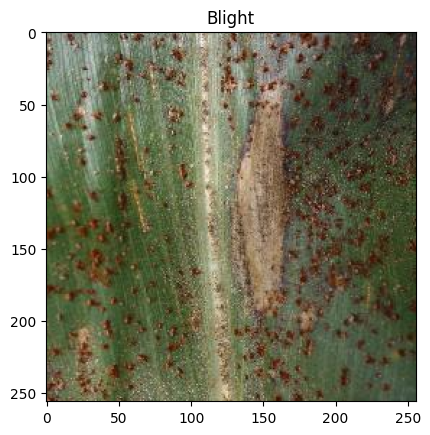

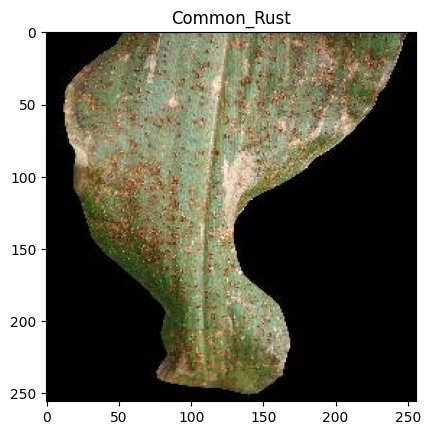

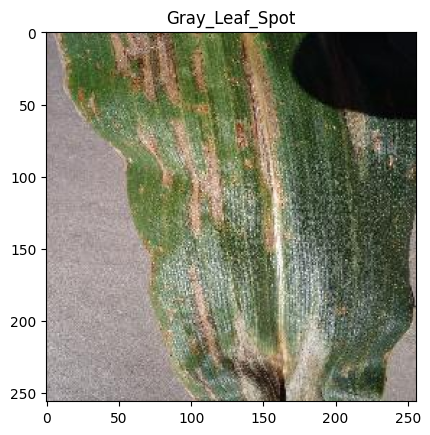

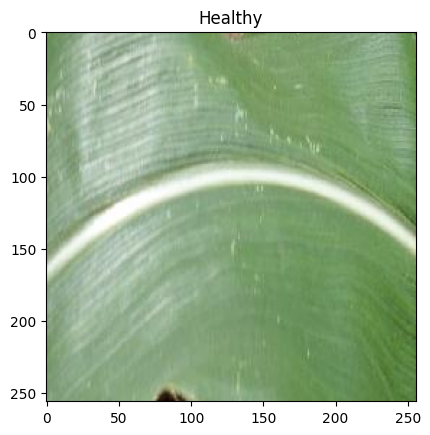

In [ ]:
display_images(50)

In [ ]:
def count_images(path, classes):
    class_count = []
    for i in classes:
        class_count.append(len(os.listdir(path + i)))

    df = pd.DataFrame(columns = ["Class_Name", "No of Images"])
    df['Class_Name'] = classes
    df["No of Images"] = class_count
    return df


In [ ]:
count_images(path, classes)

,Class_Name,No of Images
0,Blight,1146
1,Common_Rust,1306
2,Gray_Leaf_Spot,574
3,Healthy,1162


In [ ]:
def image_extensions(classes):
    for label in classes:
        extensions = []
        for img in os.listdir(path + label):
            extensions.append(img.split('.')[-1])
        print("class: ", label)
        print("extensions: ", list(set(extensions)))

In [ ]:
image_extensions(classes)

class:  Blight
extensions:  ['JPG', 'jpg', 'jpeg']
class:  Common_Rust
extensions:  ['jpg', 'JPG']
class:  Gray_Leaf_Spot
extensions:  ['JPG', 'jpg']
class:  Healthy
extensions:  ['jpg', 'JPG']


In [ ]:
def image_size(classes):

    for label in classes:
        ht, wd, depth = [], [], []
        for img in os.listdir(path + label):

            im = plt.imread(path + label + '/' + img)

            ht.append(im.shape[0])
            wd.append(im.shape[1])
            depth.append(im.shape[2])

        print("class: ", label)
        print("average height is {}, average width is {}, average depth is {}:".format(sum(ht)/len(ht), sum(wd)/len(wd), sum(depth)/len(depth)))

In [ ]:
image_size(classes)

class:  Blight
average height is 336.75392670157066, average width is 345.3979057591623, average depth is 3.0:
class:  Common_Rust
average height is 303.9502297090352, average width is 319.26722817764164, average depth is 3.0022970903522204:
class:  Gray_Leaf_Spot
average height is 291.42857142857144, average width is 309.5853658536585, average depth is 3.0034843205574915:
class:  Healthy
average height is 256.0, average width is 256.0, average depth is 3.0:


In [ ]:
image_size = (224, 224)

In [ ]:
# from keras.preprocessing.image import img_to_array, ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator

##Data Augmentation

In [ ]:
data_generator = ImageDataGenerator(rotation_range = 40,
                                         width_shift_range = 0.2,
                                         height_shift_range = 0.2,
                                         rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True,
                                         fill_mode = 'nearest',
                                         validation_split = 0.20)

In [ ]:
train_dataset = data_generator.flow_from_directory(path,
                                                  target_size = (224,224),
                                                  class_mode = "categorical",
                                                  batch_size = 64,
                                                  subset = "training")

val_dataset = data_generator.flow_from_directory(path,
                                                  target_size = (224,224),
                                                  class_mode = "categorical",
                                                  batch_size = 64,
                                                  subset = "validation")

Found 3352 images belonging to 4 classes.
Found 836 images belonging to 4 classes.


In [ ]:
def visualize_generator_data(img_count):

    for val in range(img_count):
        img, label = val_dataset.next()

        print("image shape is: ", img.shape)
        plt.imshow(img[0])

        print(img[20].shape)
        plt.show()

image shape is:  (64, 224, 224, 3)
(224, 224, 3)


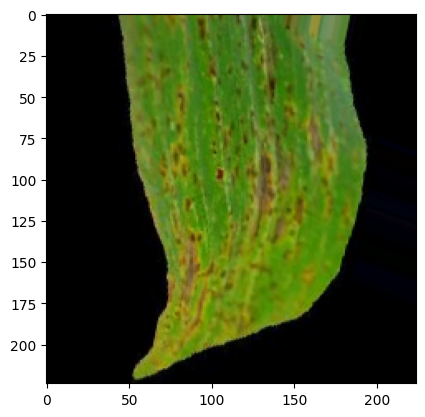

image shape is:  (64, 224, 224, 3)
(224, 224, 3)


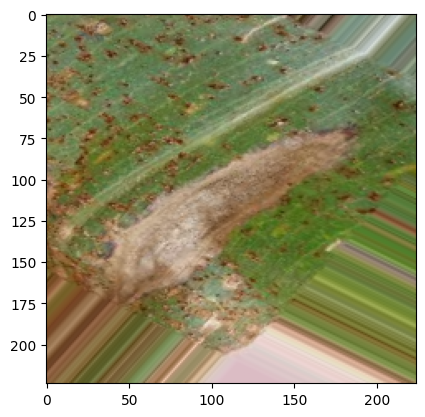

image shape is:  (64, 224, 224, 3)
(224, 224, 3)


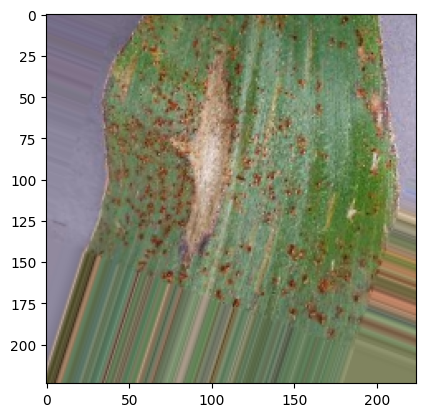

image shape is:  (64, 224, 224, 3)
(224, 224, 3)


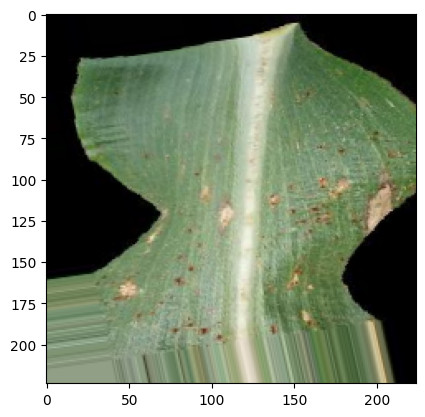

image shape is:  (64, 224, 224, 3)
(224, 224, 3)


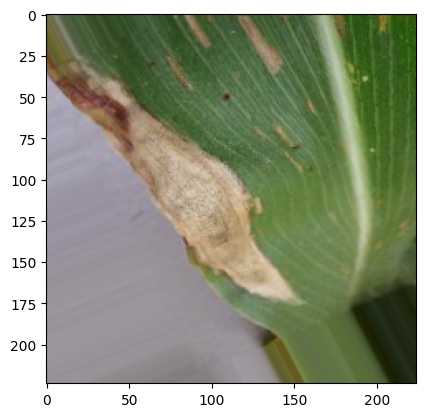

image shape is:  (64, 224, 224, 3)
(224, 224, 3)


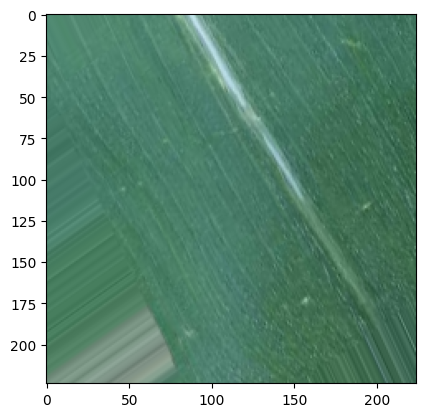

image shape is:  (64, 224, 224, 3)
(224, 224, 3)


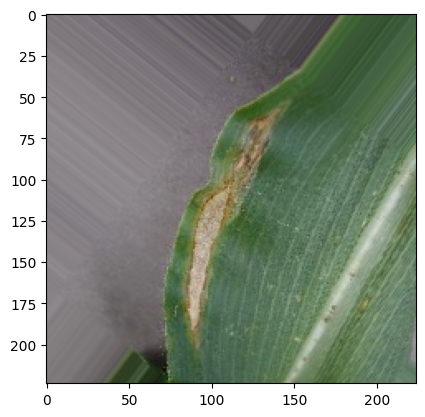

image shape is:  (64, 224, 224, 3)
(224, 224, 3)


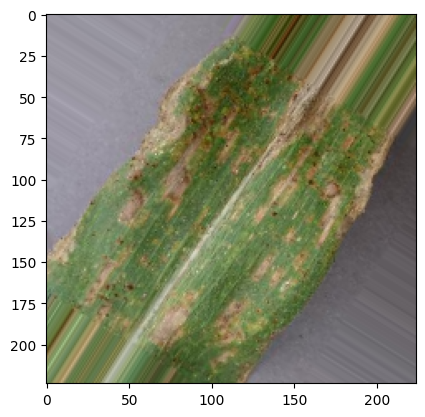

In [ ]:
visualize_generator_data(8)

In [ ]:
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.models import Model, Sequential
from keras.applications.vgg16 import VGG16

In [ ]:
from tensorflow.keras.optimizers import Adam as Adam
# from keras.optimizer_v2 import adam as adam_v2

In [ ]:
initial_lr = 0.00001
epochs = 60

In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 9.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


##Deep Learning Model

In [ ]:
def vgg_model():

    vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (224, 224, 3))


    # Freeze the layers in the base model
    for layer in vgg.layers:
        layer.trainable = False

    model = Sequential()
    model.add(vgg)
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.2))
    model.add(Dense(4, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = initial_lr),
                 metrics = ['accuracy', keras.metrics.Precision(), keras.metrics.Recall(), tfa.metrics.F1Score(num_classes=4,average="micro"), keras.metrics.AUC()])

    return model


##Model Summary

In [ ]:
vgg16_model = vgg_model()
vgg16_model.summary()

58889256/58889256 [==============================] - 0s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21,138,500
Trainable params: 6,423,812
Non-trainable params: 14,714,688
_________________________________________________________________


##Model Diagram

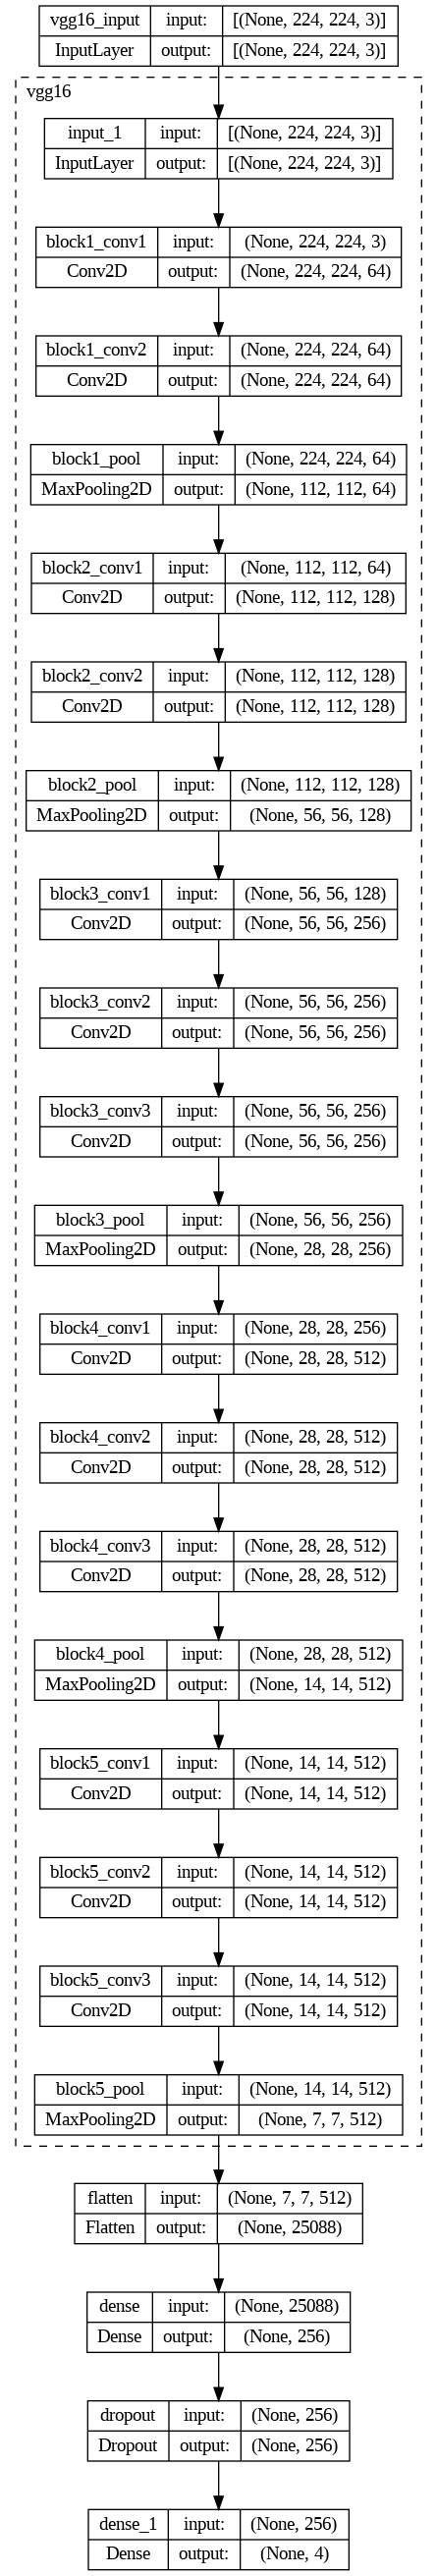

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(vgg16_model, 'vgg16.png', show_shapes = True, expand_nested=True)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
checkpoint=  ModelCheckpoint( 'vggmodel.h5', verbose=1, save_best_only=True)
earlystopping = EarlyStopping(patience=3)

In [ ]:
history = vgg16_model.fit(train_dataset,
                          epochs= epochs,
                          validation_data = val_dataset,
#                         callbacks = [checkpoint, earlystopping],
                         verbose = True)

Epoch 1/60
53/53 [==============================] - 68s 1s/step - loss: 0.7604 - accuracy: 0.6874 - precision_4: 0.8162 - recall_4: 0.5603 - f1_score: 0.6874 - auc_4: 0.8995 - val_loss: 0.3123 - val_accuracy: 0.8804 - val_precision_4: 0.8963 - val_recall_4: 0.8577 - val_f1_score: 0.8804 - val_auc_4: 0.9836
Epoch 2/60
53/53 [==============================] - 65s 1s/step - loss: 0.3548 - accuracy: 0.8601 - precision_4: 0.8741 - recall_4: 0.8449 - f1_score: 0.8601 - auc_4: 0.9777 - val_loss: 0.2661 - val_accuracy: 0.8911 - val_precision_4: 0.9080 - val_recall_4: 0.8732 - val_f1_score: 0.8911 - val_auc_4: 0.9879
Epoch 3/60
53/53 [==============================] - 65s 1s/step - loss: 0.2703 - accuracy: 0.8974 - precision_4: 0.9076 - recall_4: 0.8825 - f1_score: 0.8974 - auc_4: 0.9870 - val_loss: 0.2395 - val_accuracy: 0.8923 - val_precision_4: 0.9010 - val_recall_4: 0.8816 - val_f1_score: 0.8923 - val_auc_4: 0.9899
Epoch 4/60
53/53 [==============================] - 65s 1s/step - loss: 0.23

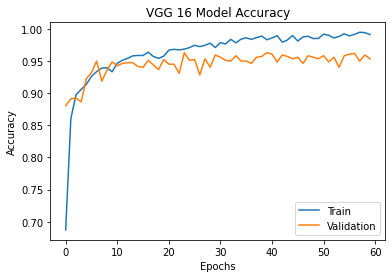

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("VGG 16 Model Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

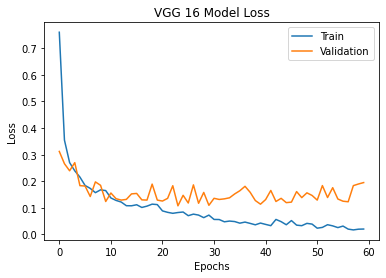

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("VGG 16 Model Loss")
plt.legend(["Train", "Validation"])
plt.show()

In [ ]:
vgg16_model.evaluate(val_dataset)

14/14 [==============================] - 13s 923ms/step - loss: 0.1864 - accuracy: 0.9605 - precision_4: 0.9617 - recall_4: 0.9605 - f1_score: 0.9605 - auc_4: 0.9913


[0.18639998137950897,
 0.9605262875556946,
 0.9616766571998596,
 0.9605262875556946,
 0.9605262875556946,
 0.9912973642349243]

In [ ]:
predictions = vgg16_model.predict_generator(val_dataset)
predictions

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


array([[7.4181009e-12, 1.0000000e+00, 8.9000106e-11, 1.2609555e-13],
       [4.4125703e-05, 4.5832301e-05, 1.0182192e-05, 9.9989986e-01],
       [4.6122814e-06, 1.1770092e-05, 6.3942980e-06, 9.9997723e-01],
       ...,
       [4.7903933e-07, 3.4515327e-07, 1.1183559e-07, 9.9999905e-01],
       [9.8134089e-01, 4.4136166e-07, 1.8657418e-02, 1.2415405e-06],
       [1.6509004e-13, 1.0000000e+00, 2.6249673e-12, 3.6035704e-15]],
      dtype=float32)

In [ ]:
predicted_class = np.argmax(predictions, axis = 1)
predicted_class

array([1, 3, 3, 2, 3, 0, 1, 3, 0, 0, 1, 2, 3, 1, 3, 1, 1, 0, 1, 2, 2, 1,
       1, 0, 1, 3, 0, 0, 3, 1, 2, 0, 2, 3, 0, 0, 2, 3, 0, 3, 1, 1, 2, 3,
       3, 1, 1, 3, 0, 3, 1, 1, 0, 3, 3, 3, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2,
       0, 2, 1, 3, 1, 2, 0, 0, 0, 3, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1,
       0, 3, 3, 1, 3, 2, 1, 1, 3, 1, 0, 0, 0, 0, 3, 0, 2, 1, 0, 0, 1, 3,
       2, 1, 1, 3, 3, 3, 1, 0, 3, 3, 0, 1, 0, 1, 1, 0, 3, 1, 1, 0, 0, 1,
       3, 1, 2, 3, 0, 2, 3, 0, 3, 1, 0, 0, 1, 3, 0, 1, 2, 1, 1, 3, 1, 0,
       0, 1, 1, 1, 0, 0, 3, 3, 2, 2, 1, 1, 1, 1, 0, 1, 0, 3, 3, 1, 3, 1,
       3, 0, 1, 1, 0, 0, 3, 2, 1, 3, 0, 3, 1, 1, 3, 3, 3, 1, 3, 2, 0, 3,
       1, 2, 0, 2, 1, 2, 1, 2, 0, 3, 1, 1, 3, 1, 1, 1, 1, 3, 0, 0, 3, 2,
       3, 0, 1, 2, 1, 3, 1, 1, 2, 0, 2, 3, 1, 3, 3, 1, 1, 3, 1, 2, 2, 3,
       2, 2, 3, 1, 0, 1, 2, 1, 1, 3, 2, 0, 1, 1, 1, 0, 3, 1, 3, 0, 0, 0,
       3, 0, 2, 2, 2, 1, 0, 1, 3, 3, 2, 0, 3, 1, 0, 1, 3, 3, 0, 2, 0, 1,
       2, 1, 1, 3, 1, 3, 3, 2, 3, 2, 1, 3, 1, 3, 1,

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
val_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print(confusion_matrix(val_dataset.classes, predicted_class))

[[53 85 33 58]
 [51 86 52 72]
 [30 35 18 31]
 [67 58 36 71]]


[[53 85 33 58]
 [51 86 52 72]
 [30 35 18 31]
 [67 58 36 71]]


<AxesSubplot:>

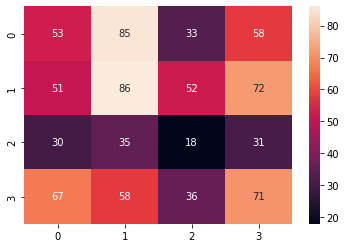

In [ ]:

#Get the confusion matrix
cf_matrix = confusion_matrix(val_dataset.classes, predicted_class)
print(cf_matrix)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)






In [ ]:
categories = ["Blight", "common_rust", "gray_leaf_spot", "healthy"]

In [ ]:
import itertools
def plot_confusion_matrix(cnf_matrix, numbers_type='numbers_and_percentage', class_names=categories, title='Confusion matrix', cmap=plt.cm.Blues, file_name='confusionmatrix.png'):
    combined = True
    cnf_matrix_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    thresh = 0.8*cnf_matrix.max() / 1.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        if numbers_type == 'numbers_and_percentage':
            st1 = '{:.2f}%'.format(100 * cnf_matrix_normalized[i, j])
            st2 = '({:2d})'.format(cnf_matrix[i, j])
            plt.text(j, i, st1+st2,
                     horizontalalignment="center", verticalalignment='bottom',
                     color="white" if cnf_matrix[i, j] > thresh else "black")

        elif numbers_type == 'percentage':
            fmt = '.2f'
            plt.text(j, i, format(cnf_matrix_normalized[i, j], fmt),
                     horizontalalignment="center", verticalalignment='bottom',
                     color="white" if cnf_matrix[i, j] > thresh else "black")
        else:
            fmt = 'd'
            plt.text(j, i, format(cnf_matrix[i, j], fmt),
                     horizontalalignment="center", verticalalignment='bottom',
                     color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(file_name)

    return

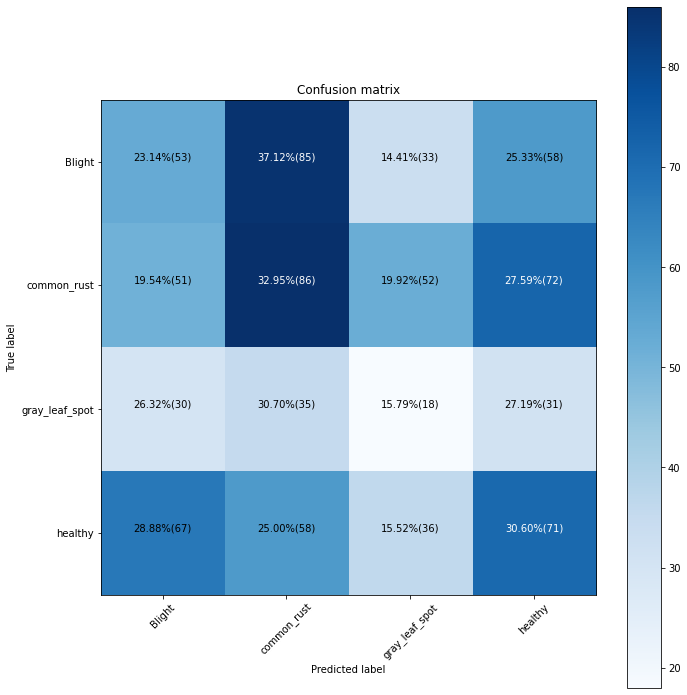

In [ ]:
plot_confusion_matrix(cf_matrix)

In [ ]:
print(confusion_matrix)

<function confusion_matrix at 0x7fa27564fa70>
